## **Student Performance Indicator**

### **Import Data and Required Packages**

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/udit/Student-Marks-Prediction/notebook/Data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

-> There are no Missing values

In [7]:
df.duplicated().sum()

np.int64(0)

-> There are no duplicate values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
-> from above discription of numerical data, all means are very close to each other - between 66 to 69.  
-> All standard deviation are also close - between 14.6 and 15.19   
-> While there is a minimum score 0 for math for writing minimum is much higher = 10 and for reading more higher = 17

### "Explore Data"

In [17]:
cols = [
    'gender',
    'race_ethnicity',
    'parental_level_of_education',
    'lunch',
    'test_preparation_course'
]

for col in cols: 
    print(f"Categories in '{col}' variable:       {df[col].unique()}")

Categories in 'gender' variable:       ['female' 'male']
Categories in 'race_ethnicity' variable:       ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:       ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:       ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:       ['none' 'completed']


In [24]:
# define numerical $ categorical columns
numerical_features = df.select_dtypes(exclude='object').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Print columns 
print(f'We have {len(numerical_features)} numerical features : {numerical_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"

In [25]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [37]:
reading_full = (df['reading_score']==100).sum()
writing_full = (df['writing_score']==100).sum()
math_full = (df['math_score']==100).sum()

print(f'Number of Students with full marks in Maths: {math_full}')
print(f'Number of Students with full marks in Writing: {writing_full}')
print(f'Number of Students with full marks in Reading: {reading_full}')

Number of Students with full marks in Maths: 7
Number of Students with full marks in Writing: 14
Number of Students with full marks in Reading: 17


In [41]:
reading_less_20 = (df['reading_score']<=20).sum()
writing_less_20 = (df['writing_score']<=20).sum()
math_less_20 = (df['math_score']<=20).sum()

print(f"Number of Students with less than 20 marks in Maths: {math_less_20}")
print(f"Number of Students with less than 20 marks in Writing: {writing_less_20}")
print(f"Number of Students with less than 20 marks in Reading: {reading_less_20}")

Number of Students with less than 20 marks in Maths: 4
Number of Students with less than 20 marks in Writing: 3
Number of Students with less than 20 marks in Reading: 1


#### Insights
-> From Above student worst perform in Maths.  
-> Best performance is in Reading

#### **Data Visualisation (EDA)**

#### Histogram & KDE

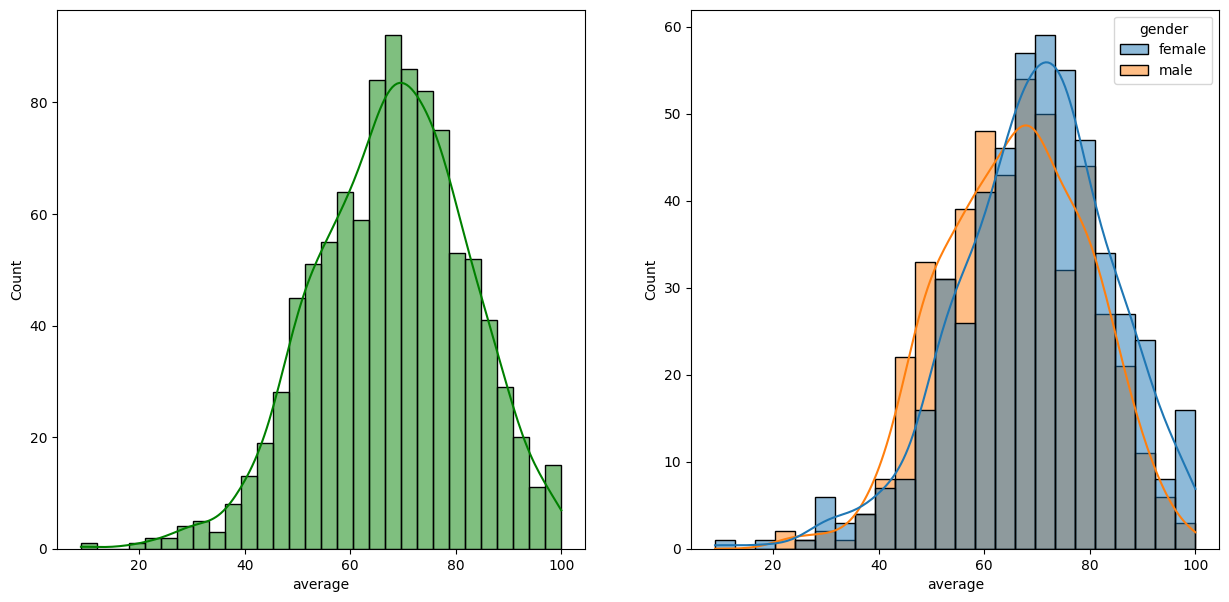

In [46]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

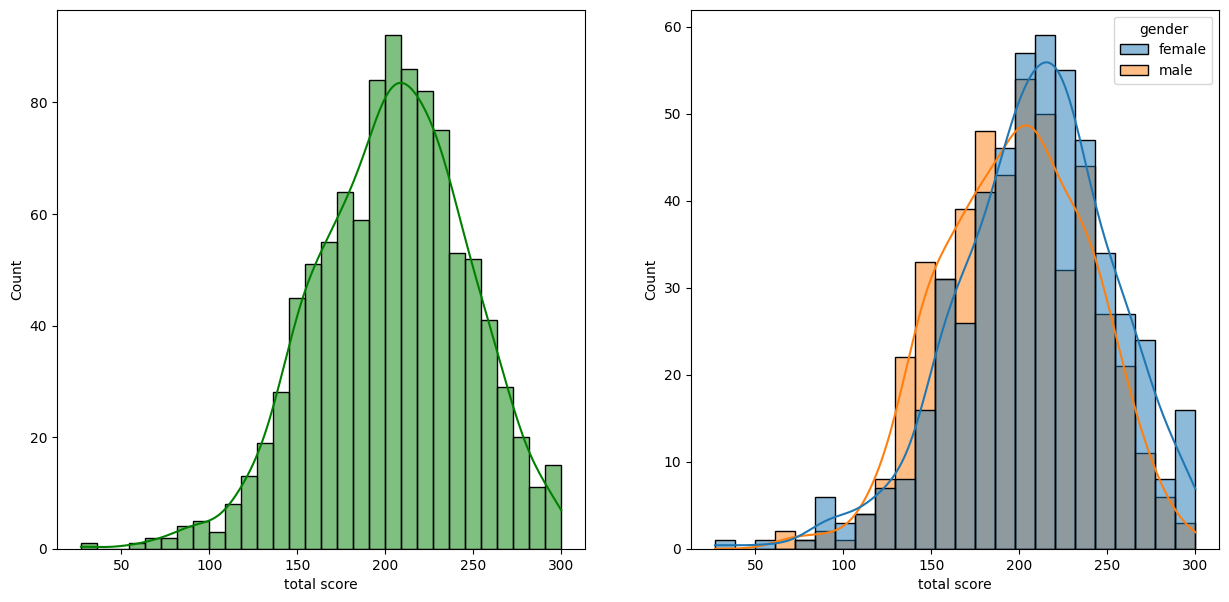

In [51]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score',kde=True, hue='gender')
plt.show()

#### Inshights 
-> Female Students are performing well in then male students

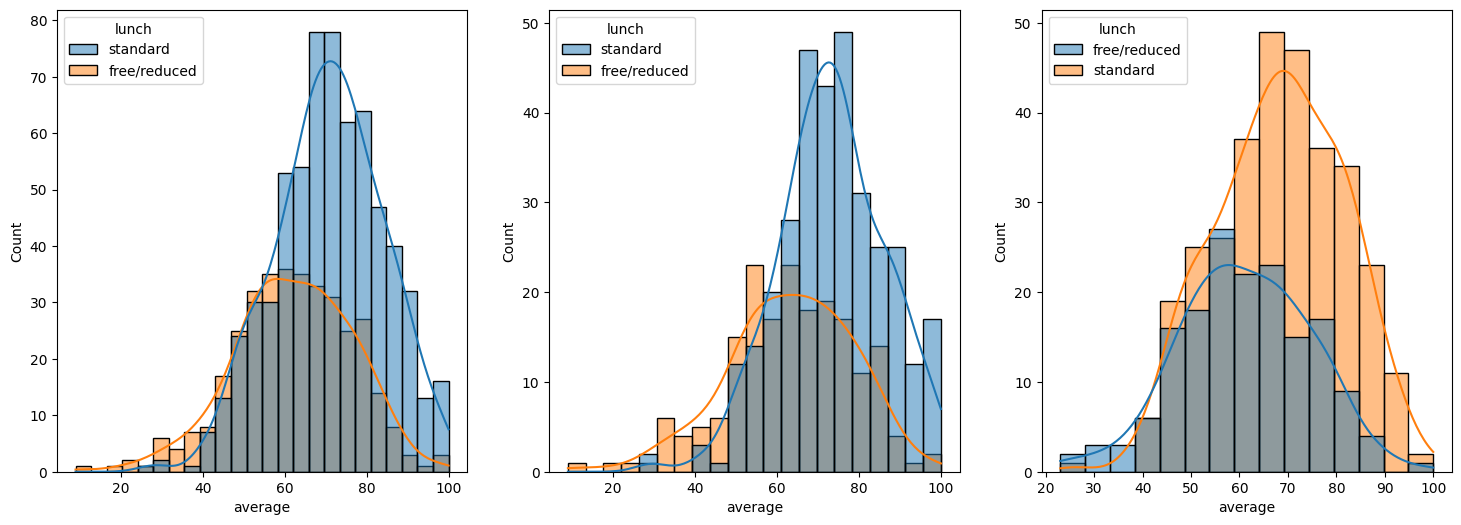

In [57]:
plt.subplots(1,3, figsize=(18,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.show()

#### Inshights
-> Standard Lunch helps perform well in exam for both male or female 


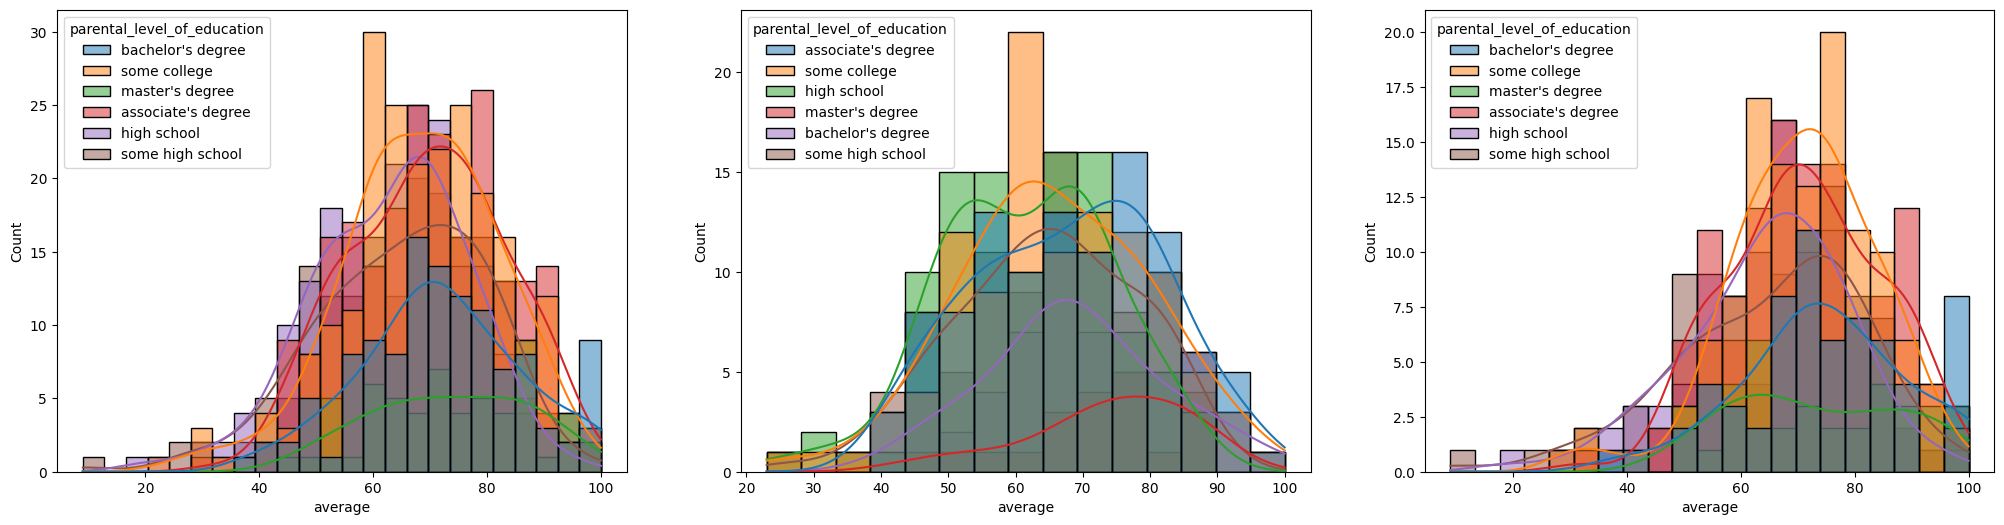

In [63]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#### Inshight 
-> In general parent education lavel don't help student perform well in exam. 

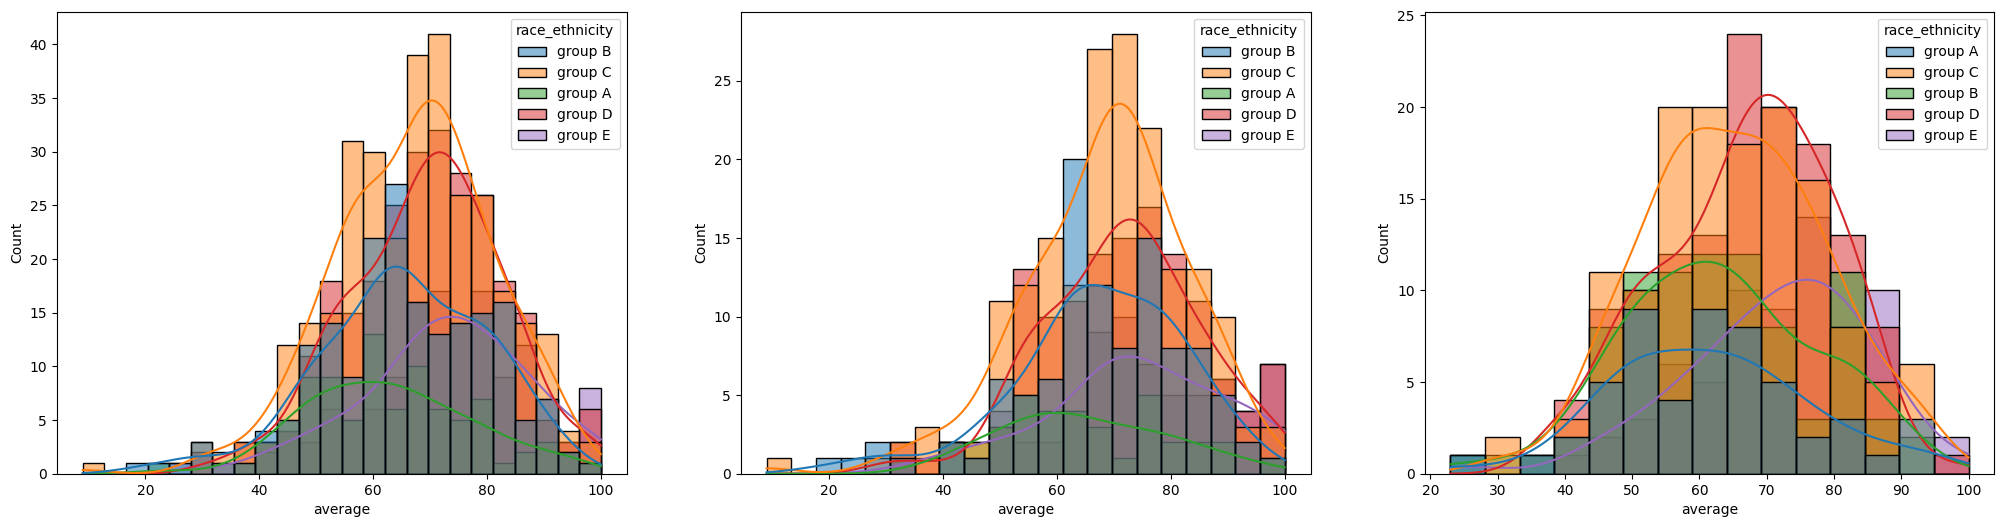

In [66]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#### Insights 
-> Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

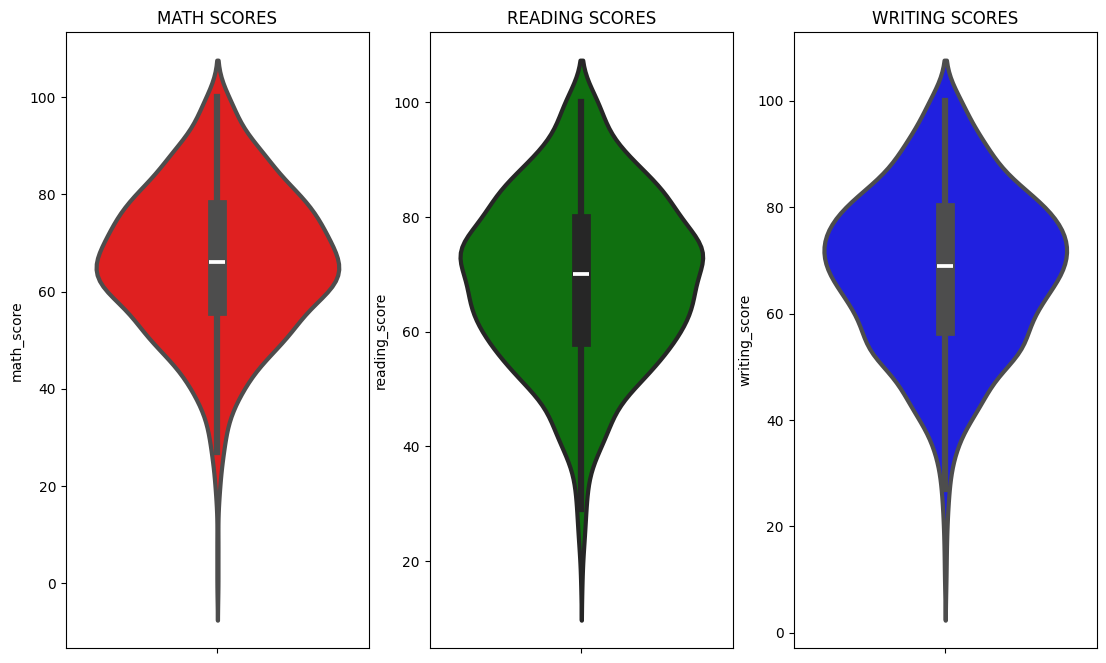

In [72]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
-> From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### Multivariate analysis using pieplot

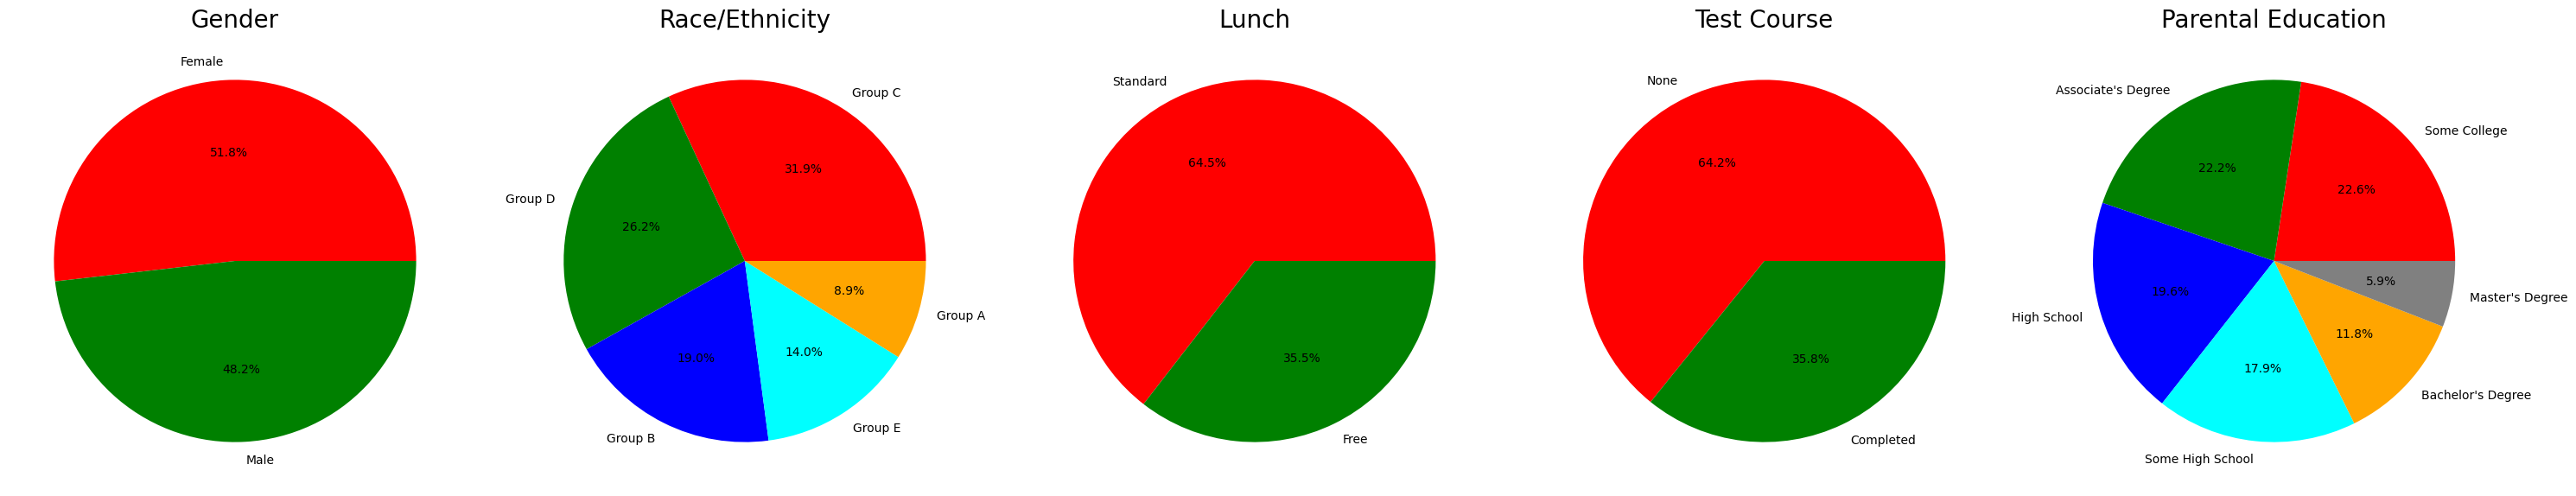

In [77]:
plt.rcParams['figure.figsize'] = (30, 12)

features = [
    ('gender', ['Female','Male'], ['red','green'], 'Gender'),
    ('race_ethnicity', ['Group C','Group D','Group B','Group E','Group A'],
     ['red','green','blue','cyan','orange'], 'Race/Ethnicity'),
    ('lunch', ['Standard','Free'], ['red','green'], 'Lunch'),
    ('test_preparation_course', ['None','Completed'], ['red','green'], 'Test Course'),
    ('parental_level_of_education', 
     ['Some College',"Associate's Degree",'High School','Some High School',
      "Bachelor's Degree","Master's Degree"],
     ['red','green','blue','cyan','orange','grey'], 
     'Parental Education')
]

plt.figure(figsize=(30, 12))

for i, (col, labels, colors, title) in enumerate(features, 1):
    plt.subplot(1, 5, i)
    size = df[col].value_counts()
    plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title(title, fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Insights
-> Number of Male and Female students is almost equal.  
-> Number students are greatest in Group C.   
-> Number of students who have standard lunch are greater.   
-> Number of students who have not enrolled in any test preparation course is greater.  
-> Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

###  **Feature Wise Visualization**
#### GENDER COLUMN
#### Univariate Analysis

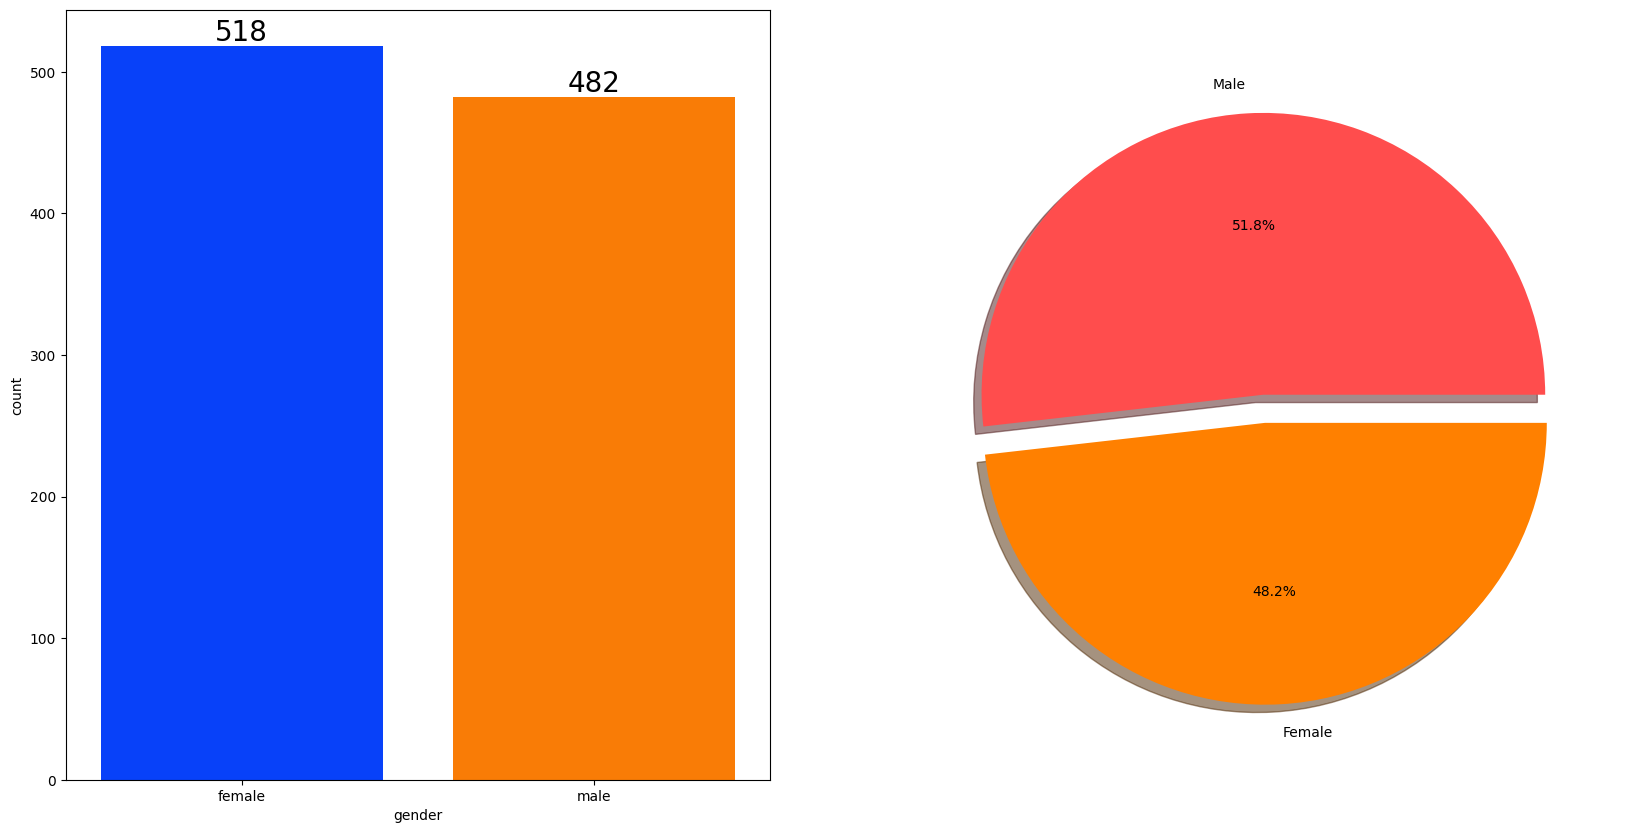

In [78]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
-> Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### Bivariate Analysis

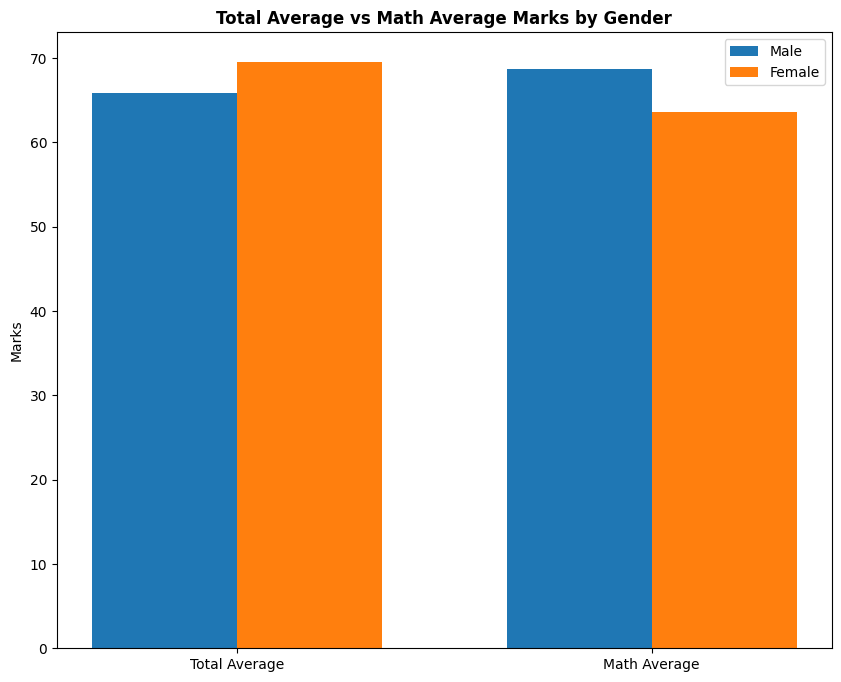

In [88]:
# Group by gender and take numeric mean
gender_group = df.groupby('gender').mean(numeric_only=True)

plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

# Extract values directly using .loc for safety
female_scores = gender_group.loc['female', ['average', 'math_score']].tolist()
male_scores   = gender_group.loc['male',   ['average', 'math_score']].tolist()

X_axis = np.arange(len(X))
width = 0.35

# Plot bars
plt.bar(X_axis - width/2, male_scores, width, label='Male')
plt.bar(X_axis + width/2, female_scores, width, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks by Gender", fontweight='bold')
plt.legend()

plt.show()

#### Insights 
-> On an average females have a better overall score than men.   
-> whereas males have scored higher in Maths.

#### RACE/EHNICITY COLUMN
#### UNIVARIATE ANALYSIS

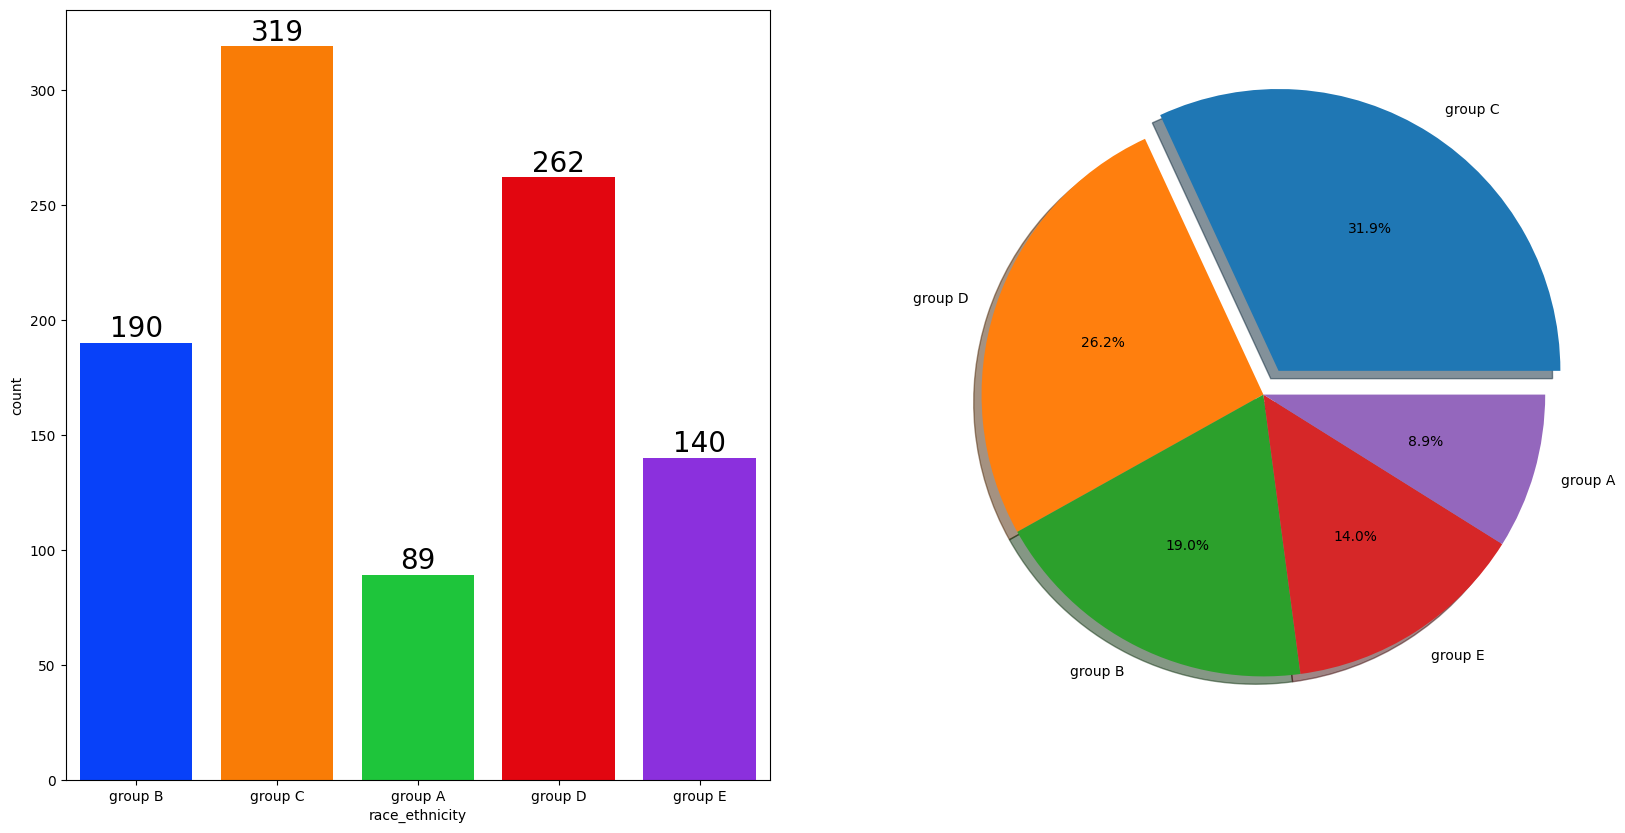

In [92]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
-> Most of the student belonging from group C /group D.   
-> Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS 

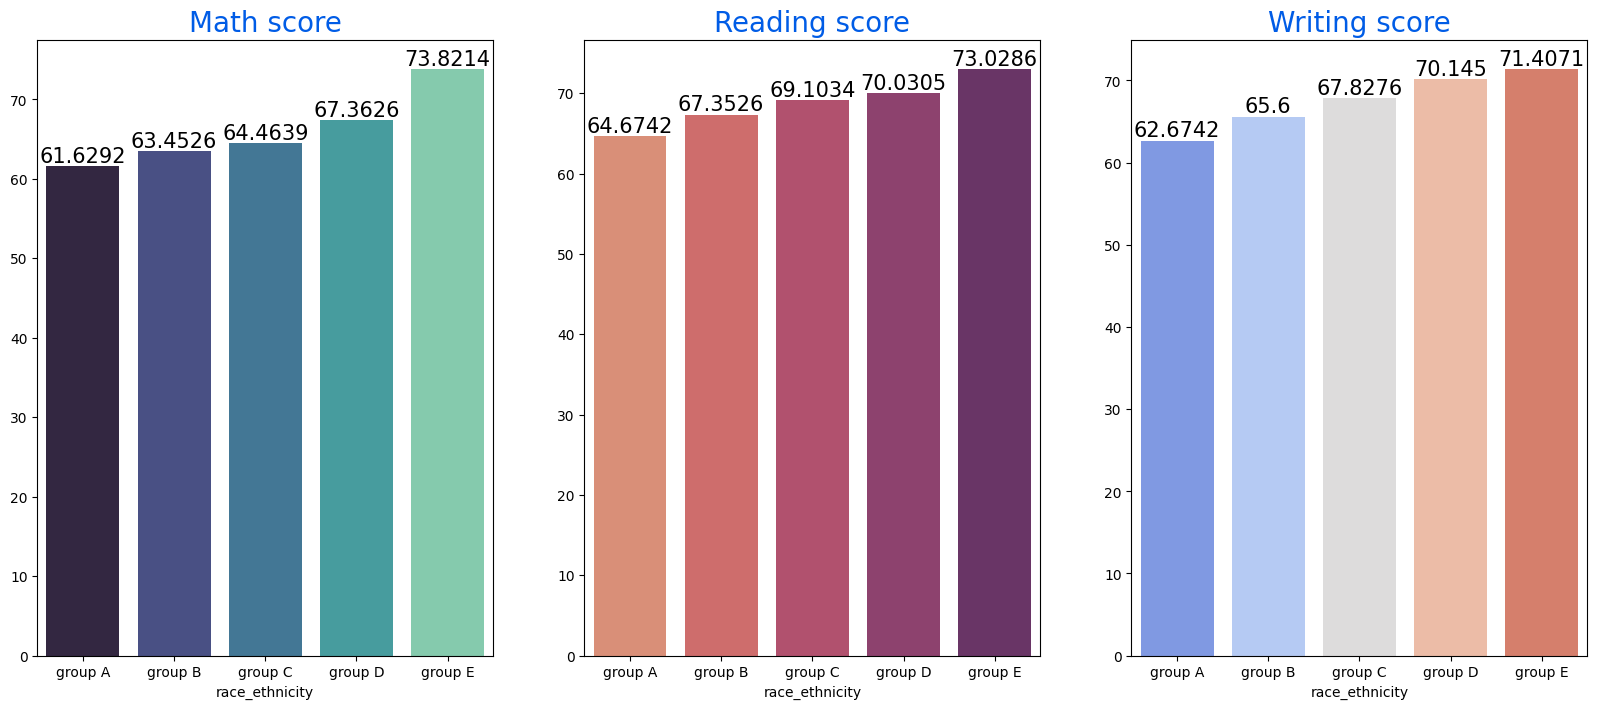

In [94]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### PARENTAL LEVEL OF EDUCATION COLUMN
#### UNIVARIATE ANALYSIS

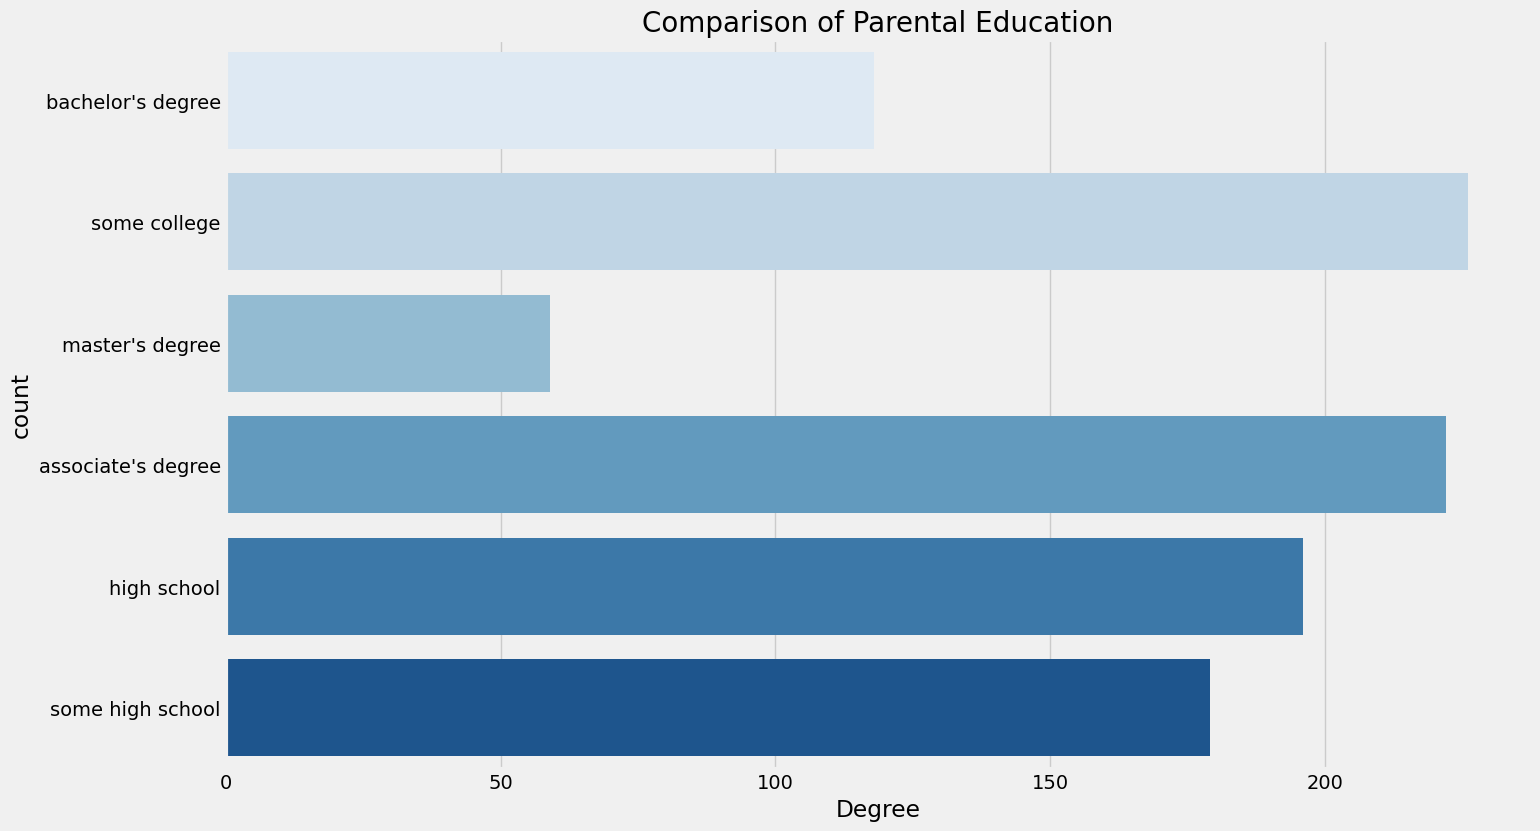

In [96]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
-> Largest number of parents are from some college.

#### BIVARIATE ANALYSIS 

<Figure size 1000x1000 with 0 Axes>

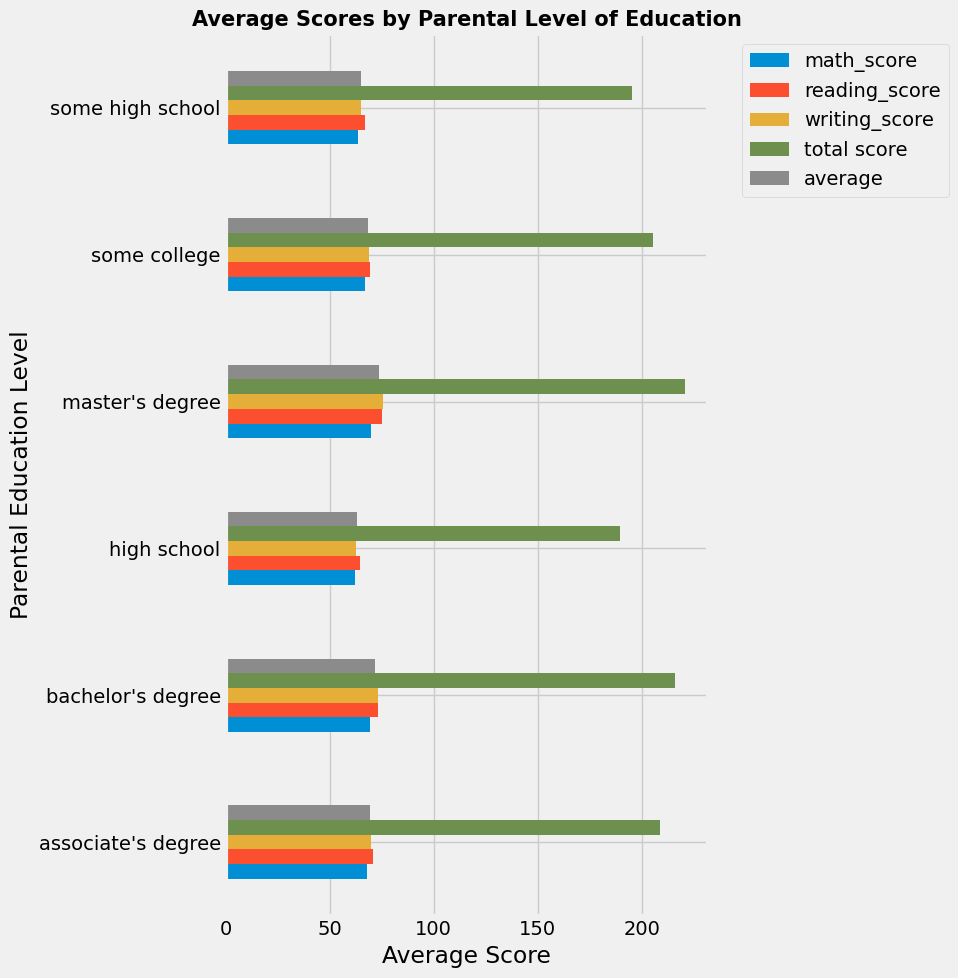

In [99]:
plt.figure(figsize=(10, 10))

(df.groupby('parental_level_of_education')
   .mean(numeric_only=True)
   .plot.barh(figsize=(10, 10), legend=True))

plt.title("Average Scores by Parental Level of Education", fontsize=15, fontweight='bold')
plt.xlabel("Average Score")
plt.ylabel("Parental Education Level")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Insights 
-> The score of student whose parents possess master and bachelor level education are higher than others.

#### LUNCH COLUMN 
#### UNIVARIATE ANALYSIS

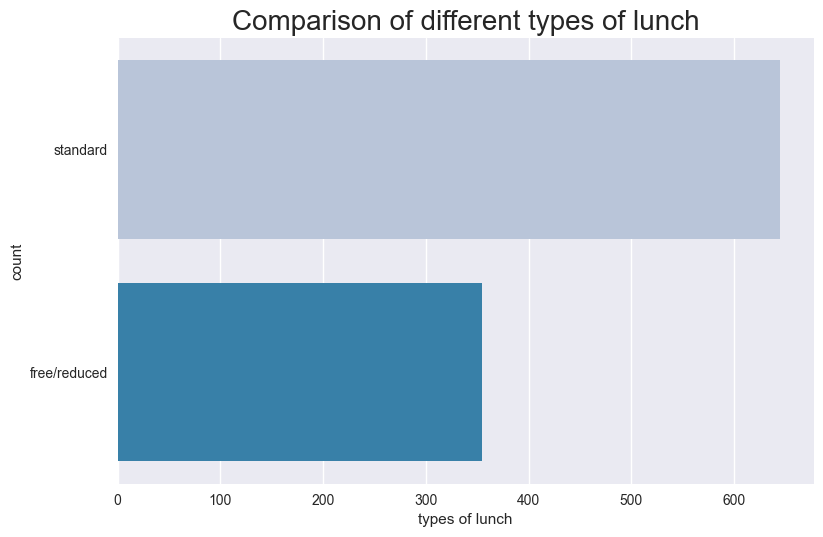

In [102]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
-> Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS

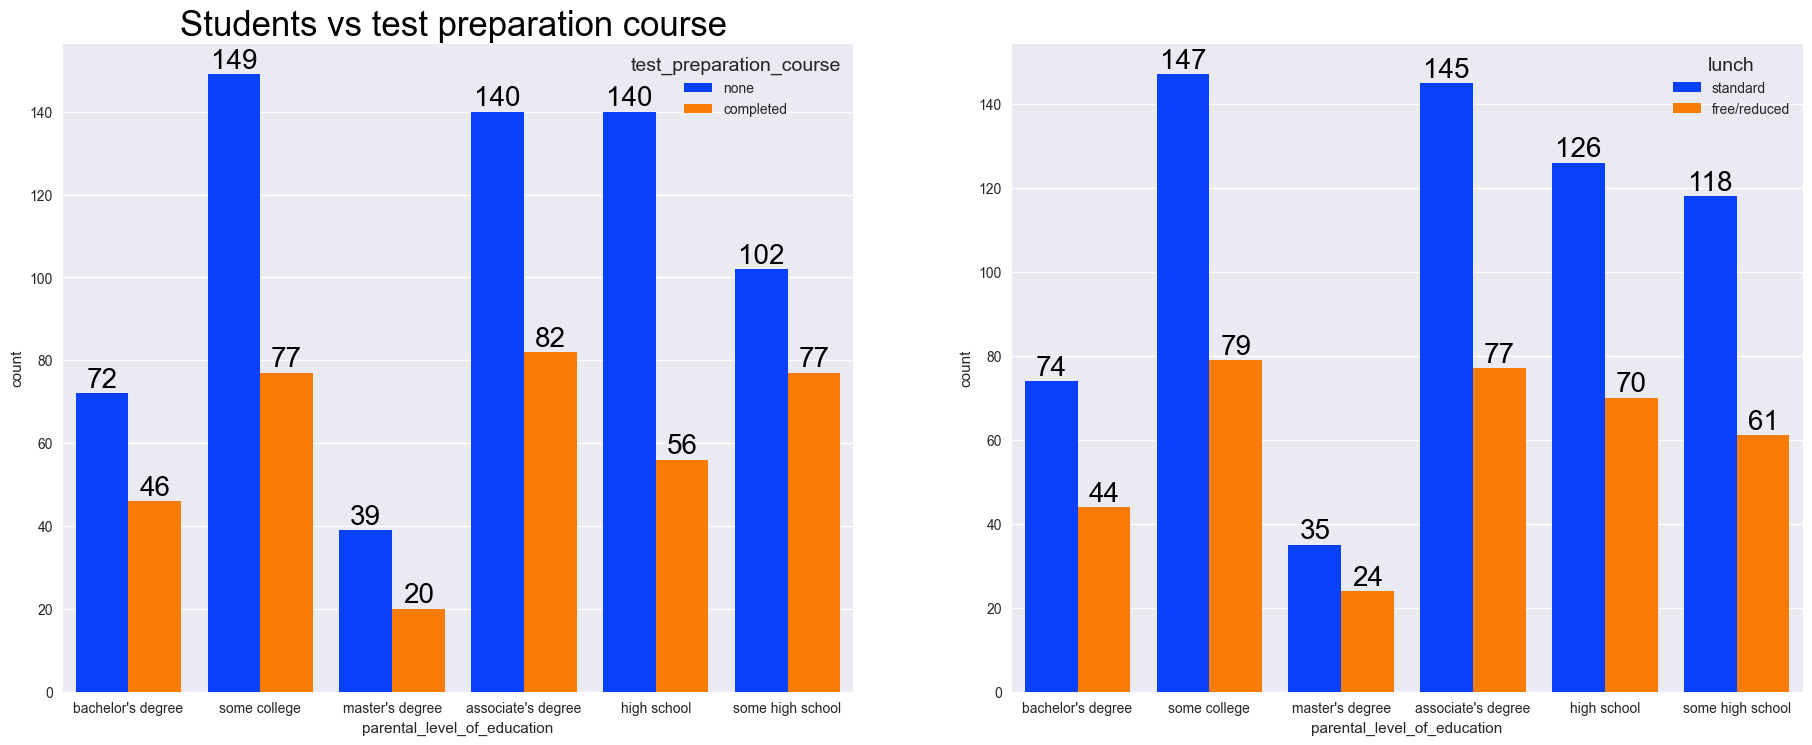

In [106]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
-> Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### TEST PREPARATION COURSE COLUMN 
#### BIVARIATE ANALYSIS

<Axes: xlabel='lunch', ylabel='writing_score'>

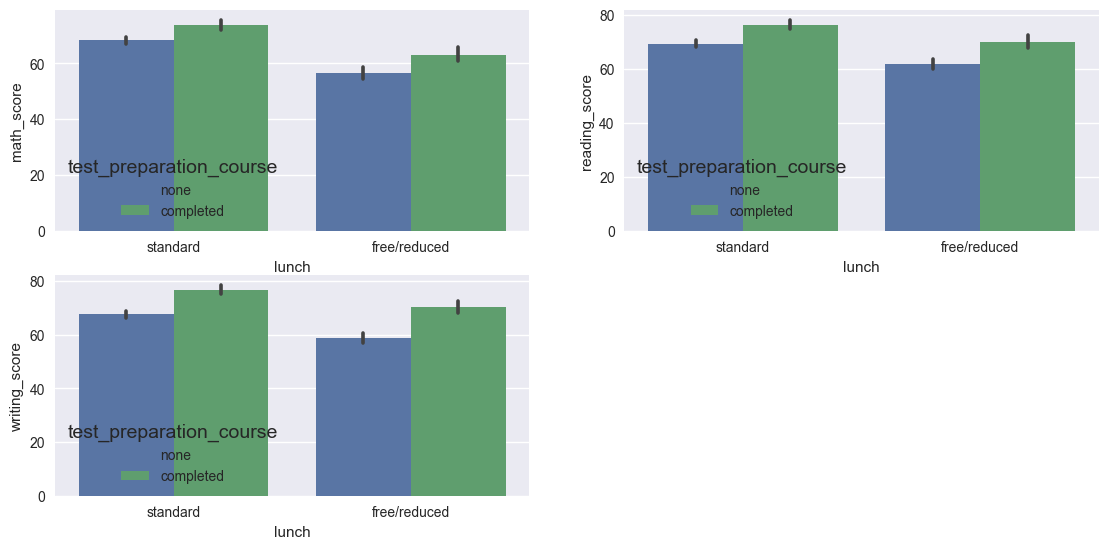

In [109]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights  
-> Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

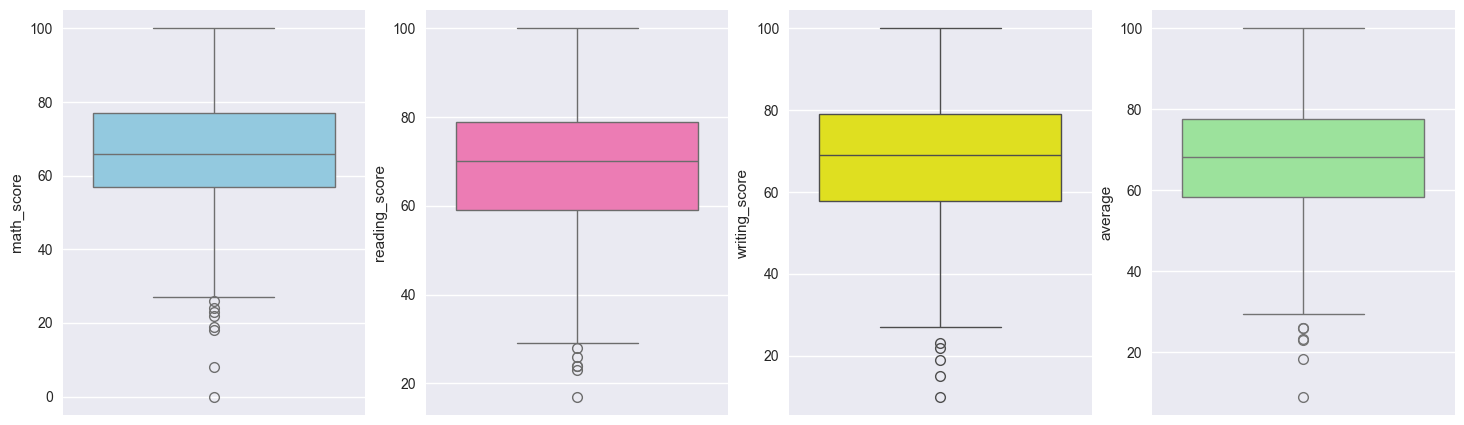

In [111]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### MULTIVARIATE ANALYSIS USING PAIRPLOT

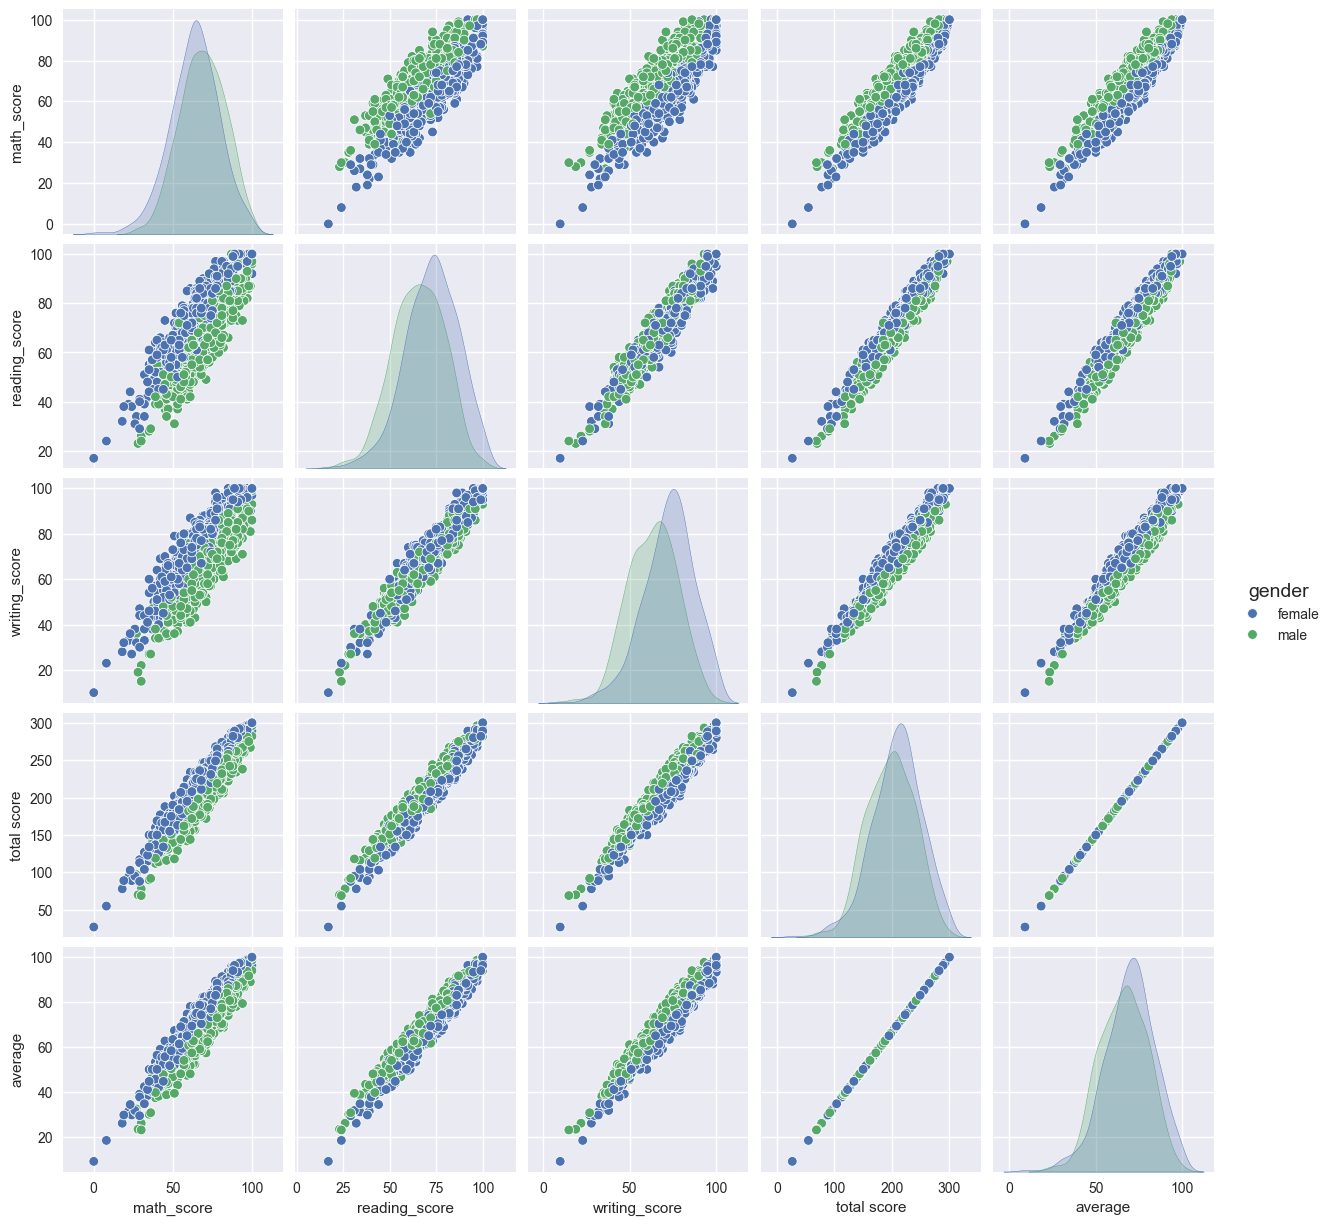

In [112]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
-> From the above plot it is clear that all the scores increase linearly with each other.

###  Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.